In [1]:
import anndata
import pandas as pd
import scimap as sm
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

Running SCIMAP  2.1.3


/Users/chiaraschiller/miniconda3/envs/scimap_local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



This script creates the cell type abundance plots for Figures 4c,d and Appendix Figure 7.

In [ ]:
# Paths
path_to_csv = './../../../../../../MI_heart_paper/data/cell_table_final.csv'
obs = pd.read_csv(path_to_csv)
output_path_appendix_Fig_7 = './../../../../../Paper_figures/condzscore_v3/MI_ct_count_Endocard_neutro_mono_ankrd1+.svg'
output_path_Fig4cd = './../../../../../Paper_figures/condzscore_v3/'

/var/folders/79/cjwcycvd2_9dyfffbym60x200000gn/T/ipykernel_16289/2237144146.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/79/cjwcycvd2_9dyfffbym60x200000gn/T/ipykernel_16289/2237144146.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



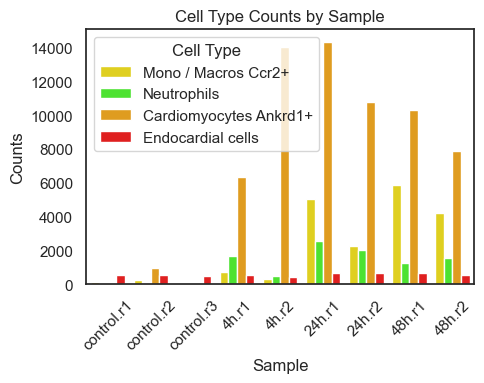

In [4]:
#plot the cell type counts, the fov on the x axis to selected cell types next to each other. On the yaxis the counts

rename_dict = {
    'Control_13': 'control.r1',
    'Control_12': 'control.r2',
    'Control_14': 'control.r3',
    '4h_97': '4h.r1',
    '4h_96': '4h.r2',
    '24h_83': '24h.r1',
    '24h_86': '24h.r2',
    '48h_79': '48h.r1',
    '48h_76': '48h.r2'
}

# Your custom order for the FOV
custom_fov_order = ['Control_13', 'Control_12', 'Control_14', '4h_97', '4h_96', '24h_83', '24h_86', '48h_79', '48h_76']  # Example order
# Define custom colors for the selected cell types
cell_type_colors = {
    'Endocardial cells': 'red',  # Blue
    'Mono / Macros Ccr2+': '#FFEA00',  # Orange
    'Neutrophils': '#39FF14',  # Green
    'Cardiomyocytes Ankrd1+': 'orange'
}

# Filter for the selected cell types
#selected_cell_types = ['Cardiomyocytes', 'Cardiomyocytes Ankrd1+']
selected_cell_types = ['Endocardial cells', 'Mono / Macros Ccr2+', 'Neutrophils', 'Cardiomyocytes Ankrd1+']
#selected_cell_types = ['Neutrophils', 'Smooth muscle cells']
#selected_cell_types = ['Endothelial cells', 'Cardiomyocytes Ankrd1+']
filtered_obs = obs[obs['final_cell_type'].isin(selected_cell_types)]


# Ensure the FOV column is ordered based on the custom vector
filtered_obs['fov'] = pd.Categorical(filtered_obs['fov'], categories=custom_fov_order, ordered=True)

# Apply renaming to the 'fov' column
filtered_obs['fov'] = filtered_obs['fov'].replace(rename_dict)

# Create the plot
fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(
    data=filtered_obs,
    x='fov',  # Field of view on the x-axis
    hue='final_cell_type',  # Cell types shown as different bars
    #order=custom_fov_order,  # Reorder FOVs based on the custom vector
    palette=cell_type_colors,  # Set the custom colors
    ax=ax
)

# Customize the plot appearance
ax.set_title("Cell Type Counts by Sample")
ax.set_ylabel("Counts")
ax.set_xlabel("Sample")
plt.xticks(rotation=45)
plt.legend(title="Cell Type")
plt.tight_layout()

plt.savefig(output_path_appendix_Fig_7, dpi=500)  # Saves the plot as an SVG file

plt.show()

In [5]:
#summarizee infarct core and border zone to infarct region
obs['region_name'] = obs['region_name'].replace({'infarct_core': 'infarct_region', 'border_zone': 'infarct_region'})
obs['region_name'].value_counts()

region_name
other_cardiac_tissue         368594
infarct_region               186903
ignore                        36331
endocardial_region            14994
epicardial_region             11816
remote_endocardial_region      6524
lumen                          2514
background                      689
Name: count, dtype: int64

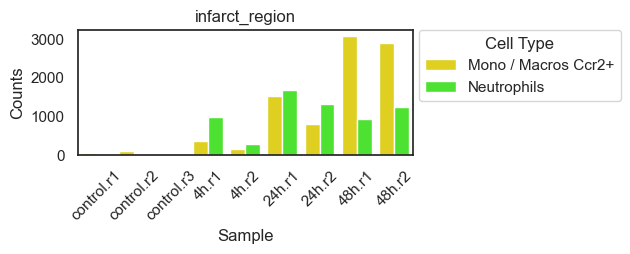

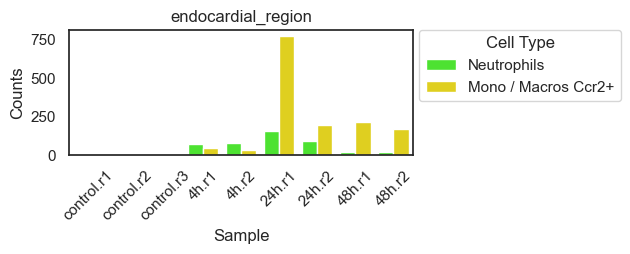

In [6]:
# Define custom colors for the selected cell types
cell_type_colors = {
    'Endocardial cells': 'red',  # Blue
    'Mono / Macros Ccr2+': '#FFEA00',  # Orange
    'Neutrophils': '#39FF14',  # Green
    'Cardiomyocytes Ankrd1+': 'orange'
}

# Filter for the selected cell types and region
selected_cell_types = ['Mono / Macros Ccr2+', 'Neutrophils']
selected_region = ['endocardial_region', 'infarct_region']
filtered_obs = obs[obs['final_cell_type'].isin(selected_cell_types)]
filtered_obs = filtered_obs[filtered_obs['region_name'].isin(selected_region)]

filtered_obs['fov'] = pd.Categorical(filtered_obs['fov'], categories=custom_fov_order, ordered=True)
filtered_obs['fov'] = filtered_obs['fov'].replace(rename_dict)

# create plot per unique region_name
for region in filtered_obs['region_name'].unique():
    filtered_obs_region = filtered_obs[filtered_obs['region_name'] == region]

    # Create the plot
    fig, ax = plt.subplots(figsize=(6.5, 2.7))
    sns.countplot(
        data=filtered_obs_region,
        x='fov',  # Field of view on the x-axis
        hue='final_cell_type',  # Cell types shown as different bars
        #order=custom_fov_order,  # Reorder FOVs based on the custom vector
        palette=cell_type_colors,  # Set the custom colors
        ax=ax
    )

    # Customize the plot appearance
    ax.set_title(f"{region}")
    ax.set_ylabel("Counts")
    ax.set_xlabel("Sample")
    # set no general lable for the x axis
    plt.xticks(rotation=45)
    plt.legend(title="Cell Type", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()

    plt.savefig(f'{output_path_Fig4cd}MI_ct_count_{region}_neutro_mono.svg', dpi=500)  # Saves the plot as an SVG file

    plt.show()